<a href="https://colab.research.google.com/github/Frinhani/LearningMachineLearning/blob/main/DL_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification


#Aula1

In [2]:
lista = [[1,2,3],
         [4,5,6]]

tns = torch.LongTensor(lista)
print(tns.dtype)
print(tns)


torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


In [3]:
arr = np.random.rand(3,4)
tns = torch.from_numpy(arr)

print(arr)
print(tns)

[[0.72173014 0.4792752  0.037718   0.50635491]
 [0.81781846 0.03903433 0.76832013 0.58017103]
 [0.87842732 0.2613613  0.13110711 0.04604705]]
tensor([[0.7217, 0.4793, 0.0377, 0.5064],
        [0.8178, 0.0390, 0.7683, 0.5802],
        [0.8784, 0.2614, 0.1311, 0.0460]], dtype=torch.float64)


In [4]:
tns1 = torch.ones(2,3)
tns0 = torch.zeros(4,5)
tnsr = torch.randn(3,3)
print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[ 1.0393, -0.5601,  0.4884],
        [ 0.0549,  0.9287,  0.0391],
        [ 0.1823, -0.6500, -0.8620]])


In [5]:
tns = tns.view(12)

In [6]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

tns = tns.to(device)
print(tns)

cuda
tensor([0.7217, 0.4793, 0.0377, 0.5064, 0.8178, 0.0390, 0.7683, 0.5802, 0.8784,
        0.2614, 0.1311, 0.0460], device='cuda:0', dtype=torch.float64)


In [7]:
import torch
tns = torch.randn(9, 12)
tns1 = tns[0:5, 0:4]
tns2 = tns[5:, 4:]

resultado = torch.mm(tns1, tns2)
print(resultado.size())

torch.Size([5, 8])


In [8]:
## Resumo do código
import torch 
tns1 = torch.randn(7,7,3)
tns2 = torch.randn(147, 1)

tns1 = tns1.view(-1, 1)
soma = tns1 + tns2

In [9]:
a = -1
b = 4
c = 0.4

x = np.linspace(-2,4,50)
y = (-a*x-c)/b

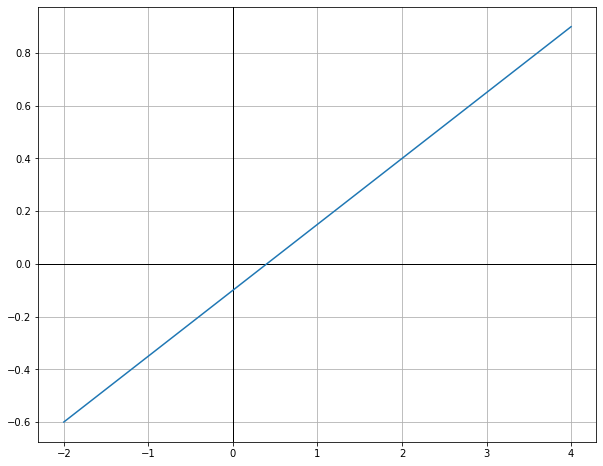

In [10]:
def plotline(a, b, c):
  x = np.linspace(-2,4,50)
  y = (-a*x-c)/b
  plt.figure(figsize=(10,8))
  plt.axvline(0,-1,1,color='k',linewidth=1)
  plt.axhline(0,-2,4,color='k',linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

plotline(a,b,c)

0


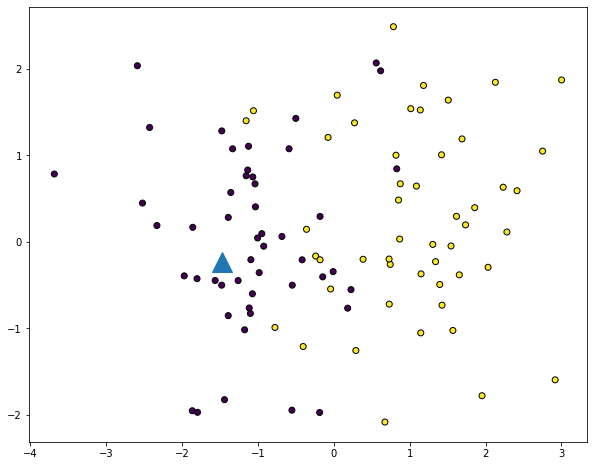

In [11]:
np.random.seed(46)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], marker='o', c=Y, edgecolors='k')
p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)


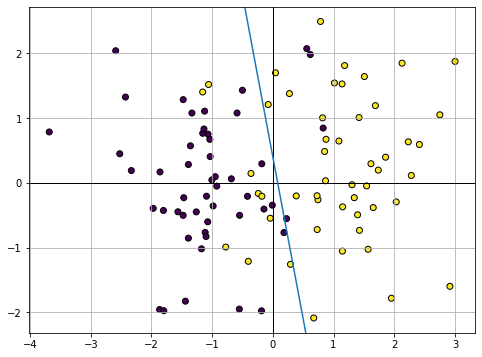

In [12]:
def plotmodel(w1, w2, b):
  plt.figure(figsize=(8,6))
  plt.scatter(X[:,0], X[:,1], marker='o', c=Y, edgecolors='k')
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  x = np.linspace(-2,4,50)
  y = (-w1*x-b)/w2
  plt.axvline(0,-1,1,color='k',linewidth=1)
  plt.axhline(0,-2,4,color='k',linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5
w2 = 1
b = -0.4

plotmodel(w1, w2, b)

0 blue


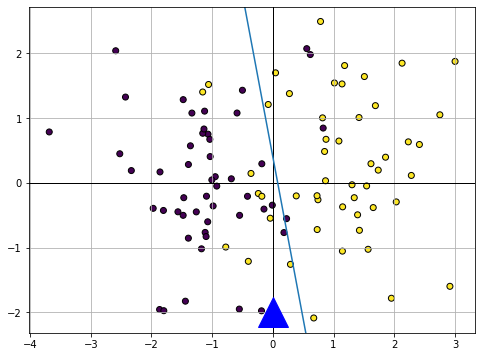

In [13]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (0,-2)

classe, cor = classify(p, w1, w2, b)
print(classe, cor)
plotmodel(w1, w2, b)
plt.plot(p[0],p[1], marker='^', color=cor, markersize=30)

In [14]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1

print('Acurácia: {0}'.format(100*acertos/len(X)))

Acurácia: 87.0


#Camada Lienar

In [15]:
perceptron = nn.Linear(in_features=3, out_features=1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


In [16]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)

weight tensor([[ 0.1882,  0.1990, -0.1285]])
bias tensor([-0.1490])


In [17]:
# w1, w2, w3 = perceptron.weight.data.numpy()[0]
# b= perceptron.bias.data.numpy()

# #w1 * x1 + w2 * x2 + w3 * x3 + b = 0 

#Ativações Não Lineares

In [18]:
perceptron = nn.Linear(2,1)
sigmoide = nn.Sigmoid()

perceptron.weight = nn.Parameter(torch.Tensor([[5, 1]]))
perceptron.bias = nn.Parameter(torch.Tensor([-0.4]))

print(perceptron.weight.data)
print(perceptron.bias.data)


tensor([[5., 1.]])
tensor([-0.4000])


<Figure size 576x432 with 0 Axes>

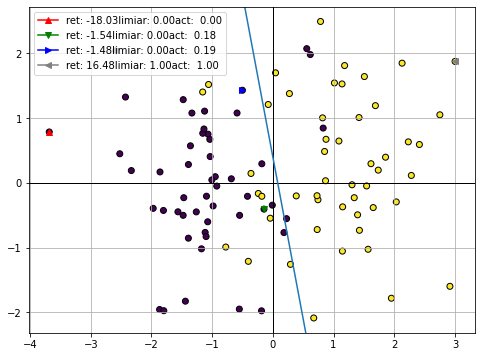

In [19]:
markers = [ '^','v','>','<']
colors = [ 'r','g','b','gray']

plt.figure(figsize=(8,6))

plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])

  plt.plot(x[0], x[1], marker=markers[k],color=colors[k], label=label)

plt.legend()
plt.show()

#MLP

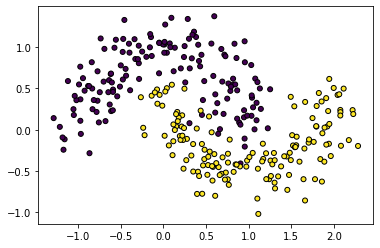

In [20]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:,0], X1[:,1], marker='o',
            c=Y1, s=25, edgecolor='k')

##nn.Sequential

In [21]:
 import torch
 from torch import nn

 input_size = 2
 hidden_size = 8
 output_size = 1

 net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),
                     nn.ReLU(),
                     nn.Linear(in_features=hidden_size, out_features=output_size))

 print(net) 

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [23]:
# from torchsummary import summary
# summary(net, input_size=(1, input_size))

##Forward

In [24]:
print(X1.dtype)
print(X1.shape)

tensor = torch.from_numpy(X1).float()
print(tensor.dtype)
pred = net(tensor)
print(pred.size())

float64
(300, 2)
torch.float32
torch.Size([300, 1])


##nn.Module

In [25]:
class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()

    #Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output 



###iniciando

In [26]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


###Forward

In [27]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [28]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [29]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
